In [1]:
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download data
# wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv" -OutFile "ChurnData.csv"

In [3]:
df = pd.read_csv("data/ChurnData.csv")

In [4]:
df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [6]:
df.isna().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [9]:
df["custcat"].value_counts()

custcat
2.0    61
3.0    48
4.0    46
1.0    45
Name: count, dtype: int64

In [10]:
df["churn"].value_counts()

churn
0.0    142
1.0     58
Name: count, dtype: int64

In [11]:
df["tenure"].value_counts().sort_values()

tenure
31.0    1
15.0    1
63.0    1
44.0    1
27.0    1
       ..
12.0    5
24.0    5
5.0     5
45.0    5
72.0    6
Name: count, Length: 68, dtype: int64

In [12]:
len(df.columns)

28

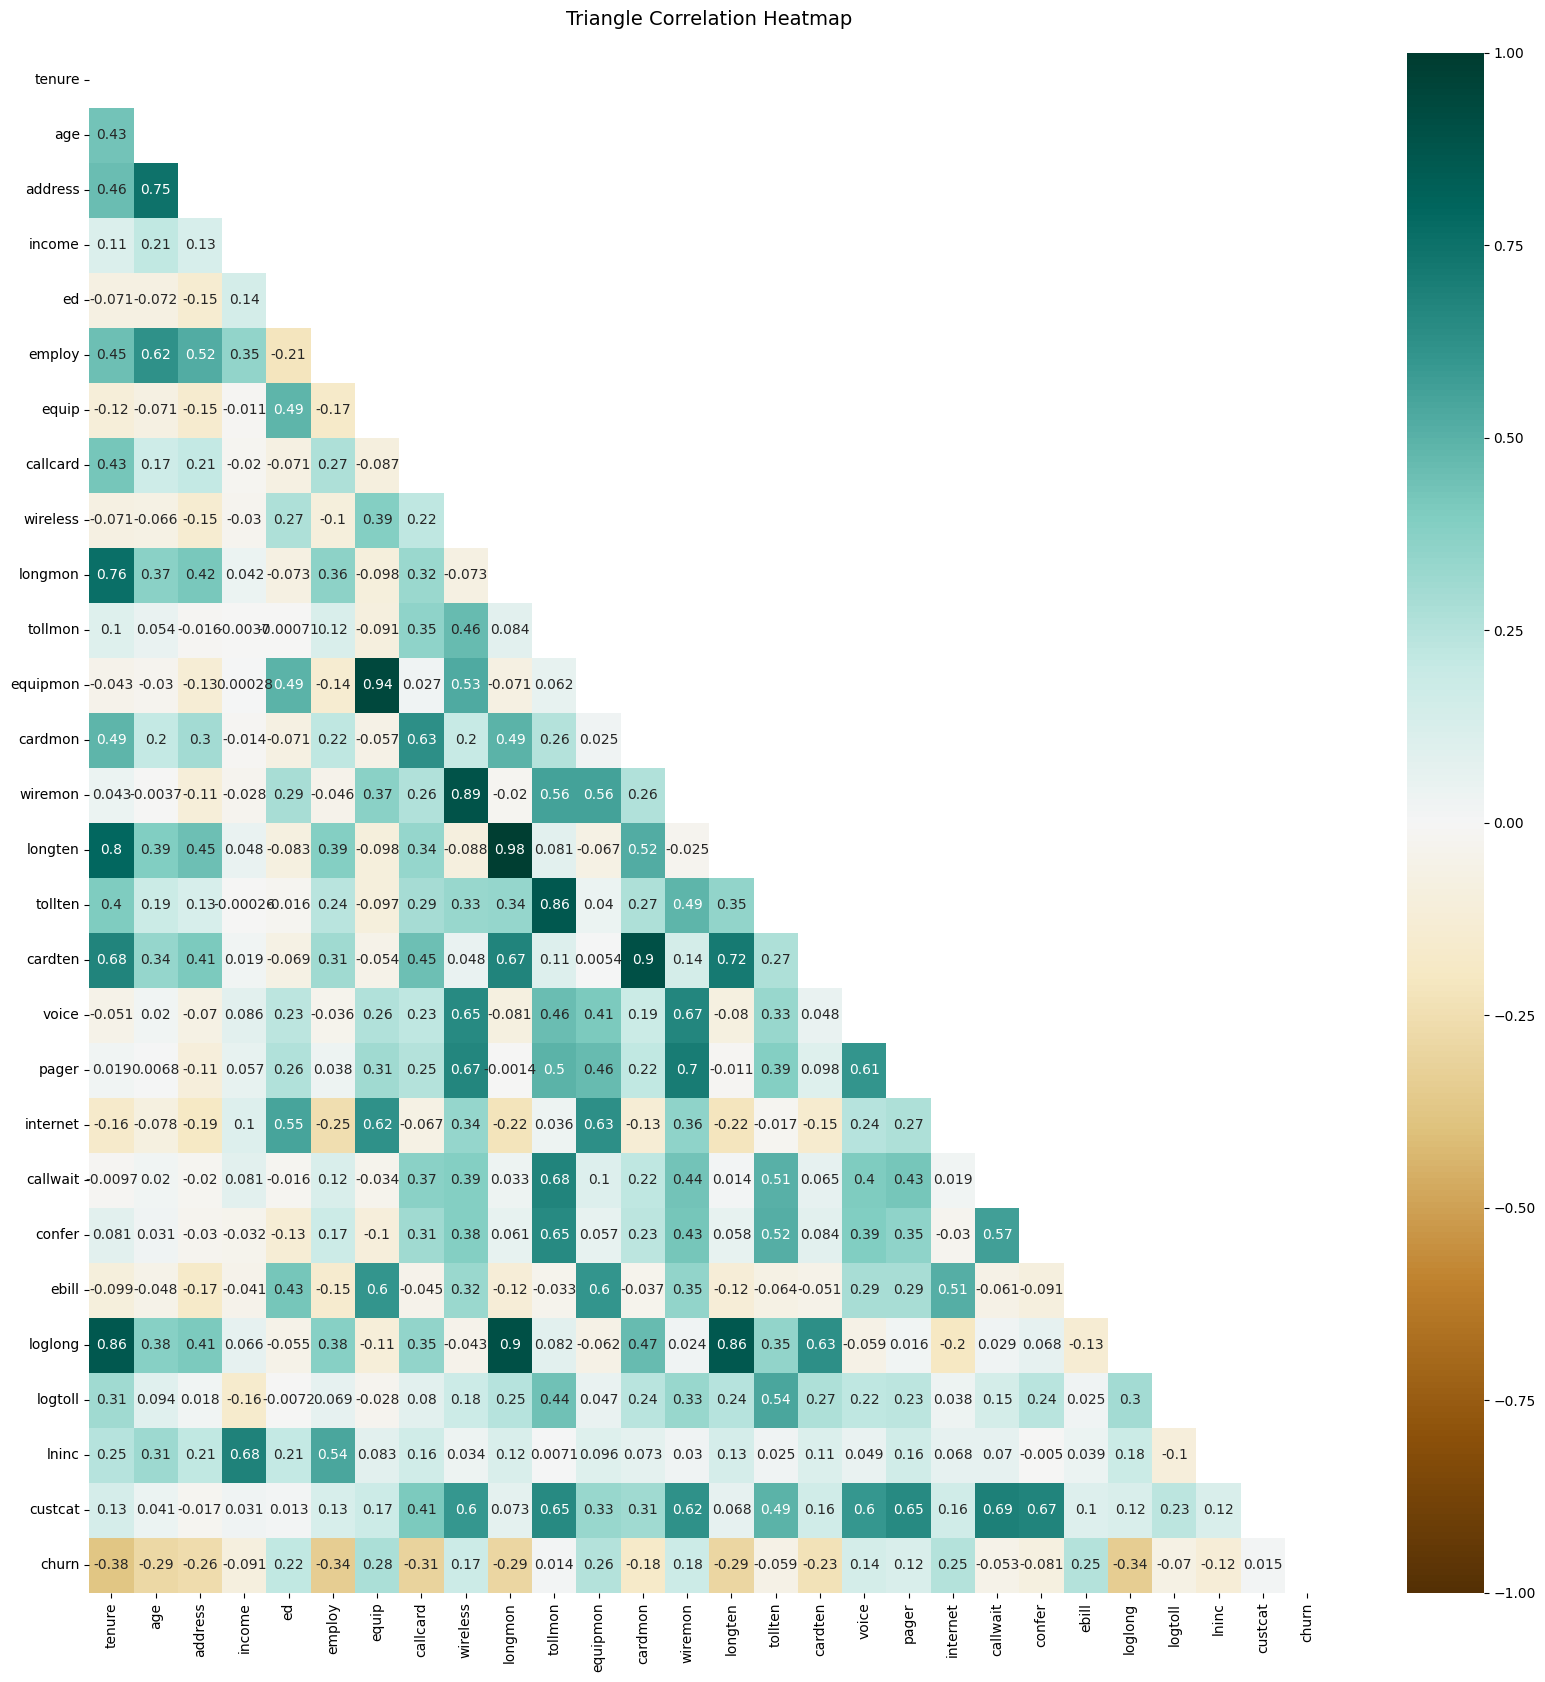

In [13]:
plt.figure(figsize=(20,20))
triangle_mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), 
                      mask=triangle_mask, 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', 
                  fontdict={'fontsize':14}, 
                  pad=20)
plt.show()

<Figure size 1200x800 with 0 Axes>

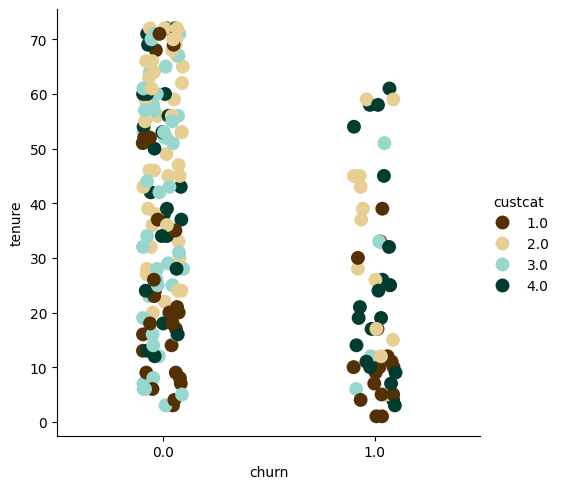

In [14]:
plt.figure(figsize=(12,8))
sns.catplot(data=df,
    y="tenure",
    x="churn",
    hue = "custcat",
    palette="BrBG",
    s=100
    )

In [15]:
X = df.loc[:,["tenure",
              "age", 
              "address", 
              "income",
              "ed",
              "employ",
              "equip",
              "ebill",
              "custcat",]].values

y = df["churn"].values

In [16]:
# Normalize the data
from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X).transform(X)
X_scaler[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695, -0.88640526,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -0.88640526, -1.36987221],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -0.88640526,  0.48758163],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  1.12815215,  1.41630855],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695, -0.88640526,  0.48758163]])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Lojistik Regresyon model, solver = liblinear
log_linear = LogisticRegression(C=0.01, solver='liblinear')
log_linear.fit(X_train, y_train.ravel())

y_pred = log_linear.predict(X_test)
print("Predict value :\n",y_pred)
y_pred_prob = log_linear.predict_proba(X_test)
print("Predict Probability : \n",y_pred_prob)

Train set: (160, 9) (160,)
Test set: (40, 9) (40,)
Predict value :
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
Predict Probability : 
 [[0.51784121 0.48215879]
 [0.29146047 0.70853953]
 [0.72553749 0.27446251]
 [0.75872693 0.24127307]
 [0.79663234 0.20336766]
 [0.44530336 0.55469664]
 [0.96301917 0.03698083]
 [0.54833355 0.45166645]
 [0.5809495  0.4190505 ]
 [0.81691761 0.18308239]
 [0.88686974 0.11313026]
 [0.88896662 0.11103338]
 [0.76450935 0.23549065]
 [0.95329903 0.04670097]
 [0.4588861  0.5411139 ]
 [0.87441676 0.12558324]
 [0.59992504 0.40007496]
 [0.65094357 0.34905643]
 [0.76660197 0.23339803]
 [0.59846016 0.40153984]
 [0.94597982 0.05402018]
 [0.68456736 0.31543264]
 [0.45478757 0.54521243]
 [0.49522484 0.50477516]
 [0.74204732 0.25795268]
 [0.9541171  0.0458829 ]
 [0.48029739 0.51970261]
 [0.89754071 0.10245929]
 [0.87380743 0.12619257]
 [0.80299333 0.19700667]
 [0.89623756 0.10376244]
 [0.713676

In [18]:

# Model performansını değerlendirme
jaccard =jaccard_score(y_test, y_pred, pos_label =0)
accuracy = accuracy_score(y_test, y_pred)
f1s = f1_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
logloss = log_loss (y_test, y_pred_prob)

print(f"Jaccard Score: {jaccard}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1s}")
print(f"Log Loss: {logloss}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Jaccard Score: 0.7027027027027027
Accuracy: 0.725
F1 Score: 0.35294117647058826
Log Loss: 0.49132908356509636
Confusion Matrix:
 [[26  5]
 [ 6  3]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.84      0.83        31
         1.0       0.38      0.33      0.35         9

    accuracy                           0.73        40
   macro avg       0.59      0.59      0.59        40
weighted avg       0.71      0.72      0.72        40



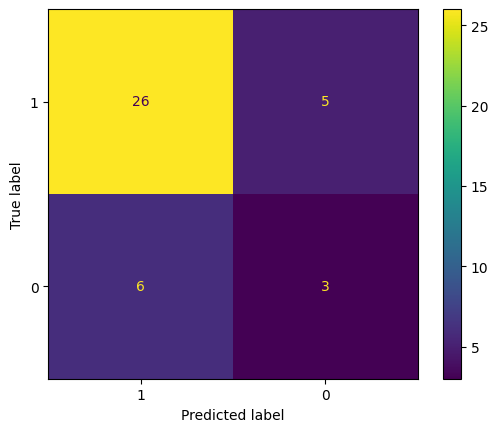

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1,0])
disp.plot()

In [20]:
# Lojistik Regresyon model, solver = sag
log_sag = LogisticRegression(C=0.01, solver='sag')
log_sag.fit(X_train, y_train.ravel())

y_pred_sag = log_sag.predict(X_test)
print("Predict value :\n",y_pred)
y_pred_sag_prob = log_sag.predict_proba(X_test)
print("Predict Probability : \n",y_pred_prob)

Predict value :
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
Predict Probability : 
 [[0.51784121 0.48215879]
 [0.29146047 0.70853953]
 [0.72553749 0.27446251]
 [0.75872693 0.24127307]
 [0.79663234 0.20336766]
 [0.44530336 0.55469664]
 [0.96301917 0.03698083]
 [0.54833355 0.45166645]
 [0.5809495  0.4190505 ]
 [0.81691761 0.18308239]
 [0.88686974 0.11313026]
 [0.88896662 0.11103338]
 [0.76450935 0.23549065]
 [0.95329903 0.04670097]
 [0.4588861  0.5411139 ]
 [0.87441676 0.12558324]
 [0.59992504 0.40007496]
 [0.65094357 0.34905643]
 [0.76660197 0.23339803]
 [0.59846016 0.40153984]
 [0.94597982 0.05402018]
 [0.68456736 0.31543264]
 [0.45478757 0.54521243]
 [0.49522484 0.50477516]
 [0.74204732 0.25795268]
 [0.9541171  0.0458829 ]
 [0.48029739 0.51970261]
 [0.89754071 0.10245929]
 [0.87380743 0.12619257]
 [0.80299333 0.19700667]
 [0.89623756 0.10376244]
 [0.71367692 0.28632308]
 [0.61866563 0.38133437]
 [0.8739365

C:\Users\Fydil35\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [21]:
# Model performansını değerlendirme
jaccard =jaccard_score(y_test, y_pred_sag, pos_label =0)
accuracy = accuracy_score(y_test, y_pred_sag)
f1s = f1_score(y_test,y_pred_sag)
conf_matrix = confusion_matrix(y_test, y_pred_sag)
class_report = classification_report(y_test, y_pred_sag)
logloss = log_loss (y_test, y_pred_sag_prob)

print(f"Jaccard Score: {jaccard}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1s}")
print(f"Log Loss: {logloss}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Jaccard Score: 0.7837837837837838
Accuracy: 0.8
F1 Score: 0.42857142857142855
Log Loss: 0.503761400376914
Confusion Matrix:
 [[29  2]
 [ 6  3]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        31
         1.0       0.60      0.33      0.43         9

    accuracy                           0.80        40
   macro avg       0.71      0.63      0.65        40
weighted avg       0.78      0.80      0.78        40



liblenear                                                       |  sag     
---                                                             | ---      
Jaccard Score: 0.7027027027027027                               | Jaccard Score: 0.7837837837837838             
Accuracy: 0.725                                                 |  Accuracy: 0.8                                    
F1 Score: 0.35294117647058826                                   |  F1 Score: 0.42857142857142855                      
Log Loss: 0.49132908356509636                                   |  Log Loss: 0.503761400376914            
Confusion Matrix:                                               |  Confusion Matrix:                    
 [[26  5]                                                       |     [[29  2]                   
 [ 6  3]]                                                       |     [ 6  3]]                           
---                               

                                 
|Classification Report: liblenear              | precision  |  recall | f1-score  | support     | ---| Classification Report: sag               | precision  |  recall | f1-score  | support          
| ---          |    ---     | ---     | ---       | ---         | ---| ---          |    ---     | ---     | ---       | ---
|         0.0  |     0.81   |   0.84  |    0.83   |     31      | ---|         0.0  |     0.83   |   0.94  |    0.88   |     31           
|         1.0  |     0.38   |   0.33  |    0.35   |      9      | ---|         1.0  |     0.60   |   0.33  |    0.43   |      9          
|              |            |         |           |             | ---|              |            |         |           |              
|    accuracy  |            |         |    0.73   |     40      | ---|    accuracy  |            |         |    0.80   |     40          
|   macro avg  |     0.59   |   0.59  |    0.59   |     40      | ---|   macro avg  |     0.71   |   0.63  |    0.65   |     40          
|weighted avg  |     0.71   |   0.72  |    0.72   |     40      | ---|weighted avg  |     0.78   |   0.80  |    0.78   |     40      

